# Training and testing of the Decision Tree 

In [3]:
# Question 6 and 7 :
# Training the 6 algortihms against the 5 datasets 

from curses import raw
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from numpy import nan
import pandas as pd
from sklearn.impute import KNNImputer
from scipy.stats import friedmanchisquare
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# List of the models to use
#models = ["gradient_boosting","tree_classifier","svm_classifier","random_forest_classifier","knn_classifier","multi_layer_perceptron"]
models = ["tree_classifier"]
# Loading the different datasets 
#data = ["data/labor-negotiation/labor_negotiation_cleaned.csv","data/heart-disease/heart_normalized.csv","data/allData_normalized.csv","data/DB1.csv","data/DB2.csv"]
data = ["allData_normalized.csv"]
# Creating a table to keep track of the results 
summary_results = pd.DataFrame(columns=["Tree"])

for d in data:
    
    for model in models:
        dataset = pd.read_csv(d)

        if (d=="allData_normalized.csv"):
            X = dataset.drop(['Unnamed: 0',"canabis"],axis=1)
            y = dataset[["canabis"]]

        # Now that we have the dataset, we can prepare the models 
        if (model =="tree_classifier"):
            clf = tree.DecisionTreeClassifier()

        # We can prepare the search space for hyoper-tuning
        if (model =="tree_classifier"):
            parameters = {
                "criterion":["gini"],
                "splitter":["best"],
                "max_depth":[3]
            }


        # Using GridSearchCV we can now do the hypertuning 
        cv = GridSearchCV(estimator=clf,param_grid=parameters,cv=10,verbose=2)
        cv.fit(X,y.values.ravel())

        # Displaying the results for the model 
        print("For "+model.upper(), " and dataset "+d+" : ")
        print("The best estimator across ALL searched params: ",cv.best_estimator_)
        print("The best score across ALL searched params: ",cv.best_score_)
        print("The best parameters across ALL searched params: ",cv.best_params_)

        # Now that we have the dataset, we can prepare the models 
        if (model =="tree_classifier"):
            treeAcc = cv.best_score_



Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
For TREE_CLASSIFIER  and dataset allData_normalized.csv : 
The best estimator across ALL searched params:  DecisionTreeClassifier

# Explainable AI

## Visualisation of the tree

[Text(0.5, 0.875, 'country <= 0.768\ngini = 0.441\nsamples = 1884\nvalue = [619, 1265]\nclass = Yes'),
 Text(0.25, 0.625, 'age <= 0.328\ngini = 0.166\nsamples = 841\nvalue = [77, 764]\nclass = Yes'),
 Text(0.125, 0.375, 'ss <= 0.427\ngini = 0.078\nsamples = 641\nvalue = [26, 615]\nclass = Yes'),
 Text(0.0625, 0.125, 'gini = 0.258\nsamples = 105\nvalue = [16, 89]\nclass = Yes'),
 Text(0.1875, 0.125, 'gini = 0.037\nsamples = 536\nvalue = [10, 526]\nclass = Yes'),
 Text(0.375, 0.375, 'oscore <= 0.289\ngini = 0.38\nsamples = 200\nvalue = [51, 149]\nclass = Yes'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.334\nsamples = 189\nvalue = [40, 149]\nclass = Yes'),
 Text(0.75, 0.625, 'ss <= 0.503\ngini = 0.499\nsamples = 1043\nvalue = [542, 501]\nclass = No'),
 Text(0.625, 0.375, 'age <= 0.493\ngini = 0.451\nsamples = 635\nvalue = [417, 218]\nclass = No'),
 Text(0.5625, 0.125, 'gini = 0.496\nsamples = 418\nvalue = [227, 191]\nclas

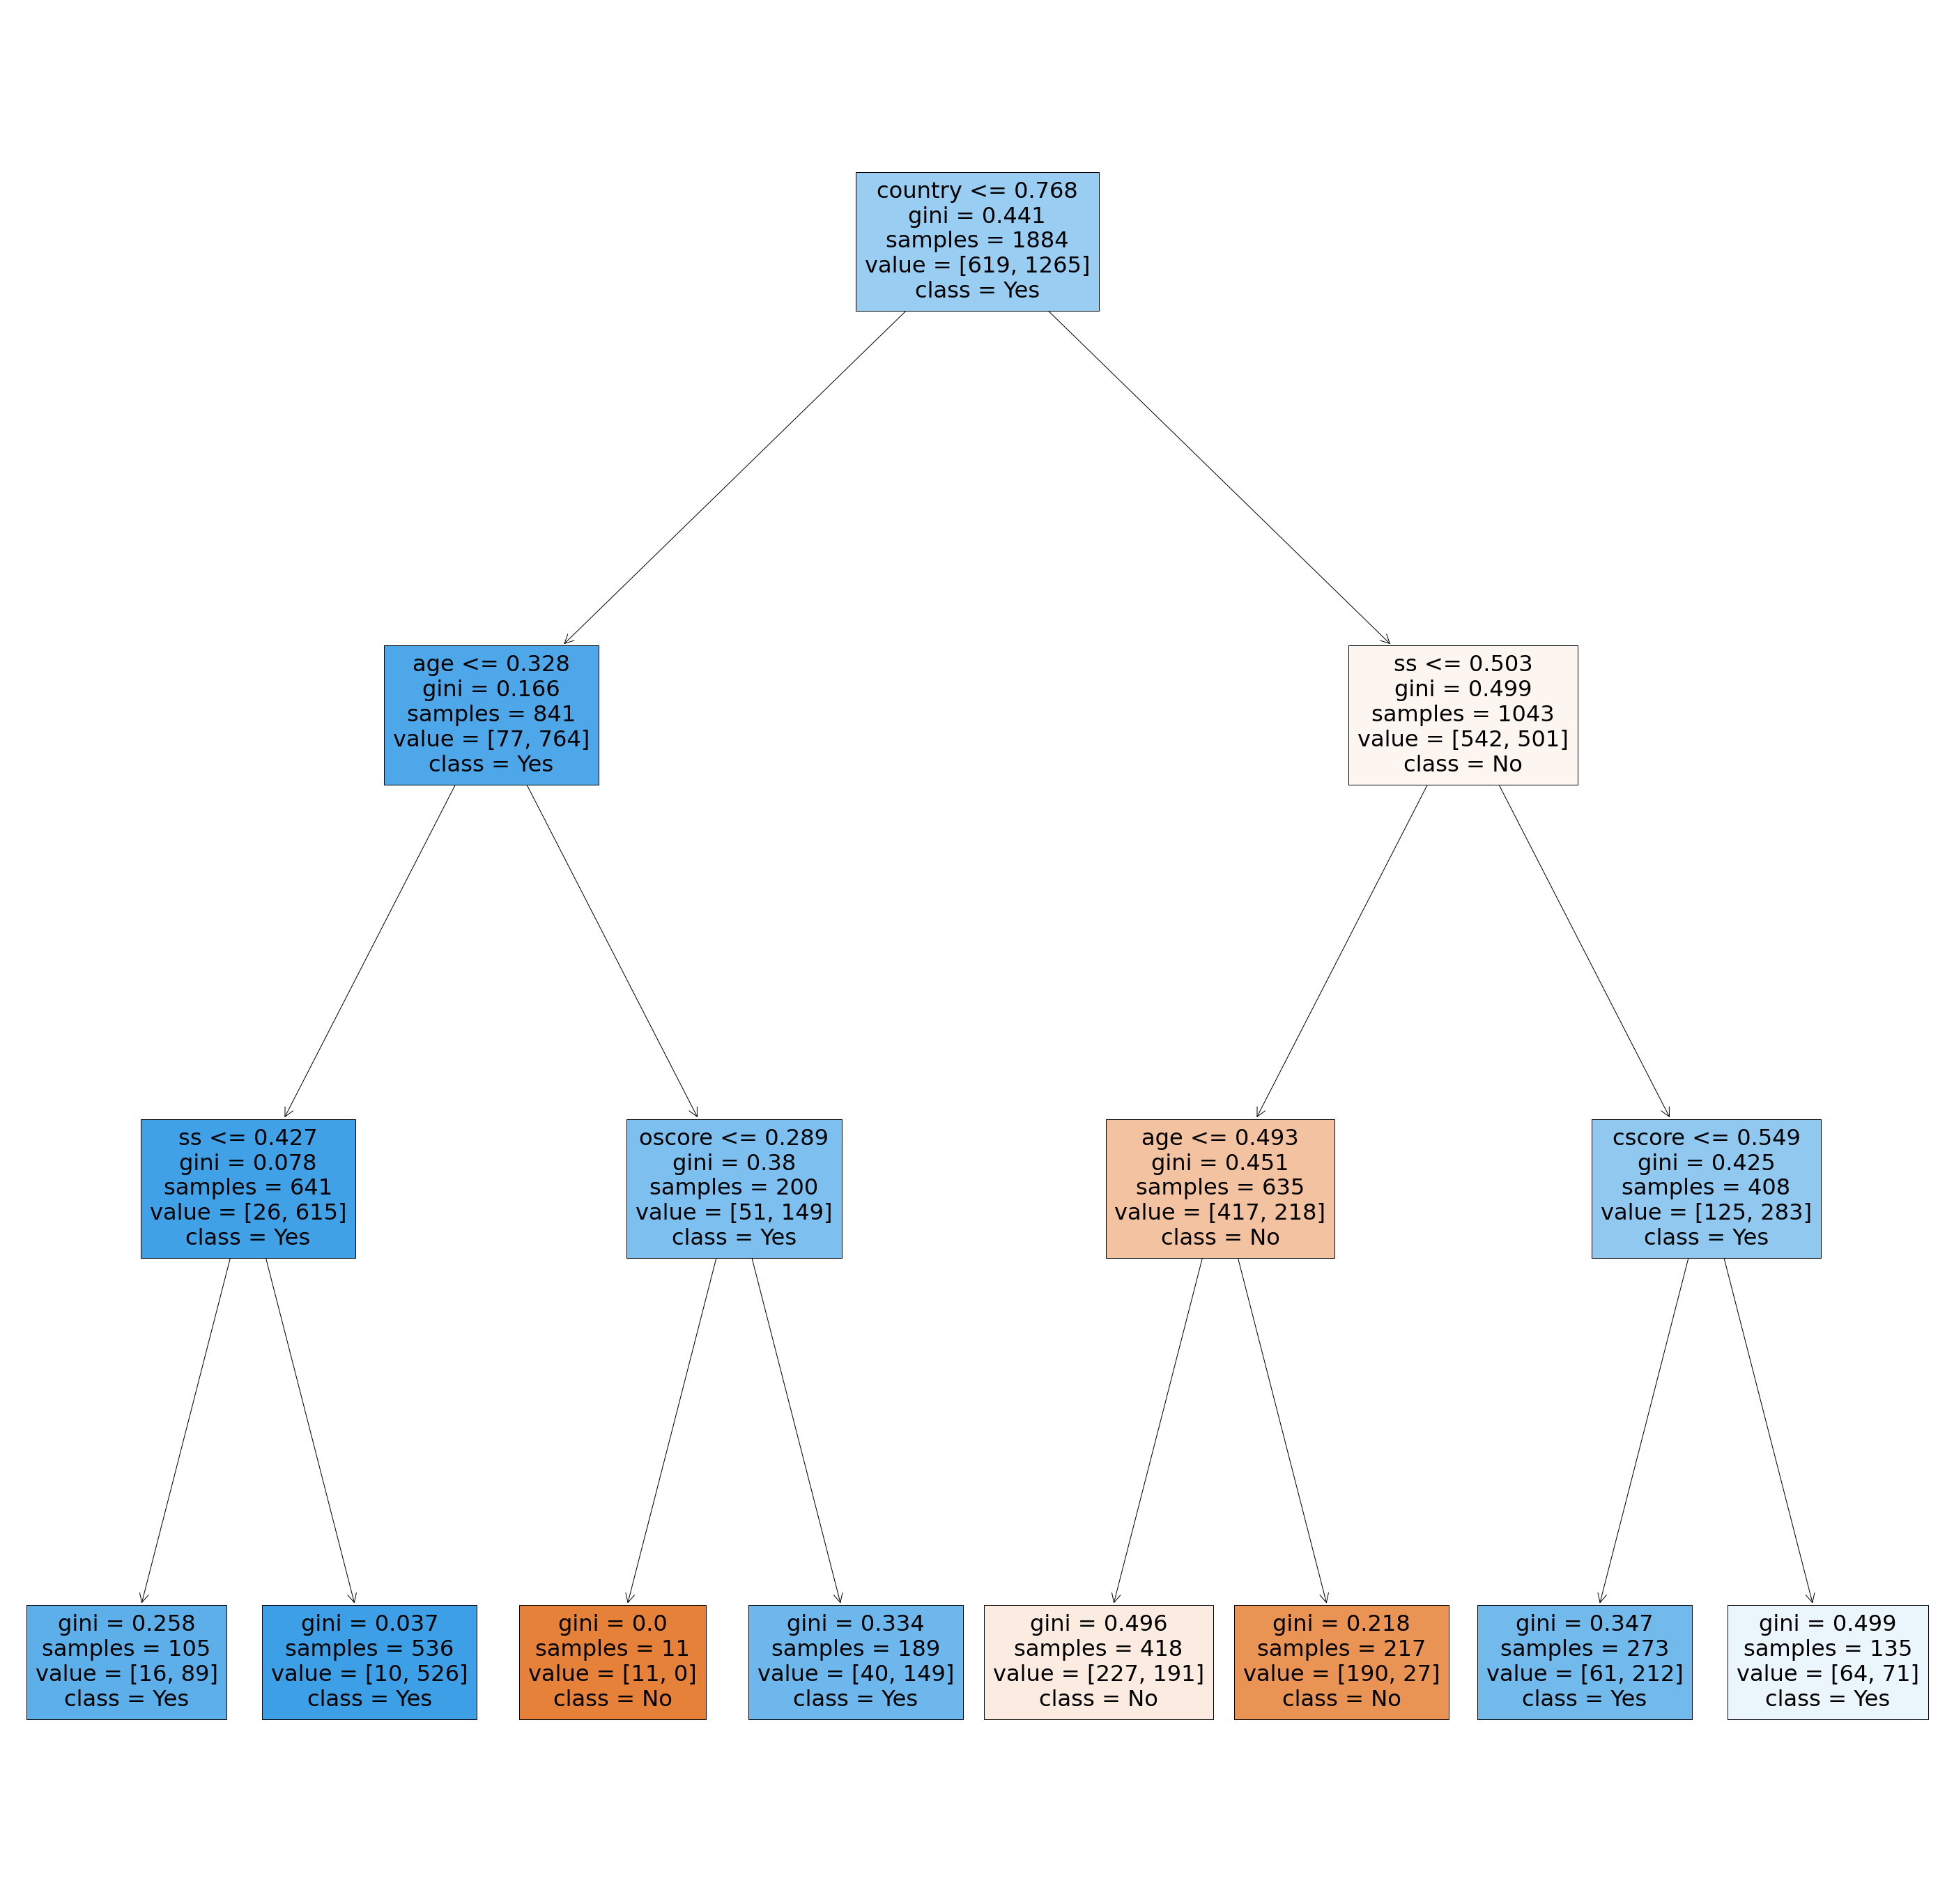

In [4]:
# Plotting the tree
fig = plt.figure(figsize=(50,50))
tree.plot_tree(cv.best_estimator_,class_names=["No","Yes"],feature_names=["age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss"],filled=True)

## Feature importance

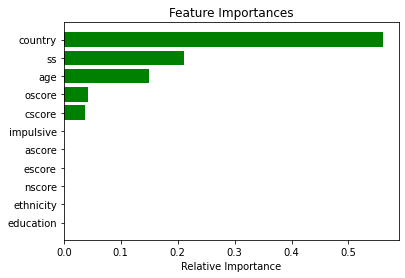

In [5]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pylab as plt
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier


# Plotting the feature importance
importances = cv.best_estimator_.feature_importances_
indices = np.argsort(importances)
features = ["age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss"]
plt.title('Feature Importances')
j = 11# top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

## Metrics

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Get the data 
dataset = pd.read_csv("allData_normalized.csv")

# Create the model
model = DecisionTreeClassifier(criterion="gini",max_depth=4,splitter="best")

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Unnamed: 0',"canabis"],axis=1), dataset[["canabis"]], test_size=0.3, random_state=1) # 70% training and 30% test

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.793286
Precision: 0.814554
Recall: 0.901299
F1 score: 0.855734
ROC AUC: 0.732417
[[102  79]
 [ 38 347]]
